In [12]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [13]:
#downloading and preparing sentiment analyzer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
#Frankensons: Before
FrankBefore = pd.read_csv('/content/Frankensons Before.csv')
FrankBefore.head(3)

,Name,Review
0,30-Dec-22,Best pizza in town. Service is awesome too. Fr...
1,17-Dec-22,Was just driving by looking for a meal with my...
2,11-Dec-22,Very good food! Been here about 5 times. The c...


In [15]:
scores = []

for each in FrankBefore['Review']:
  FrankBeforeScores = sentiment.polarity_scores(each)
  scores.append(FrankBeforeScores['compound'])

#print(scores)

FrankBefore['SentimentScore'] = scores
FrankBefore.head(4)

#export to csv
FrankBefore.to_csv('FrankBeforeWithScores.csv', index=False)

In [16]:
#counting the total number of pos values to compare to overall total number of reviews

totalPositiveScoresBefore = (FrankBefore['SentimentScore']>0).sum()
print(totalPositiveScoresBefore)
#33

positiveRatioBefore = (FrankBefore['SentimentScore']>0).mean()
print(positiveRatioBefore)
# so the positive review proportion here would be 33/35 or 0.9429


print(len(FrankBefore))
#35

totalNegativeScoresBefore = (FrankBefore['SentimentScore']<=0).sum()
print(totalNegativeScoresBefore)
#2


negativeRatioBefore = (FrankBefore['SentimentScore']<=0).mean()
# proportion is 2/35 (negative) or 0.0571
print(negativeRatioBefore)

33
0.9428571428571428
35
2
0.05714285714285714


In [17]:
#Frankensons: After
FrankAfter = pd.read_csv('/content/Frankensons After.csv')
FrankAfter = FrankAfter.filter(['Date','Name'], axis=1)
FrankAfter=FrankAfter.dropna()
FrankAfter.head(3)

,Date,Name
0,22-Sep-24,"Went bc of Keith Lee hype , the food was goood..."
1,19-Sep-24,Phone order my pizza. 2 medium. They said give...
2,16-Sep-24,The Italian sub is the best I have ever tasted...


In [18]:
scores2 = []

for each in FrankAfter['Name']:
  FrankAfterScores = sentiment.polarity_scores(each)
  scores2.append(FrankAfterScores['compound'])

#print(scores2)

FrankAfter['SentimentScore'] = scores2
FrankAfter.head(4)

#export to csv
FrankAfter.to_csv('FrankAfterWithScores.csv', index=False)

In [19]:
#counting the total number of pos values to compare to overall total number of reviews

totalPositiveScoresAfter = (FrankAfter['SentimentScore']>0).sum()
print(totalPositiveScoresAfter)
#283

positiveRatioAfter = (FrankAfter['SentimentScore']>0).mean()
print(positiveRatioAfter)
# so the positive review proportion here would be 283/340 or 0.8324


print(len(FrankAfter))
#340

totalNegativeScoresAfter = (FrankAfter['SentimentScore']<=0).sum()
print(totalNegativeScoresAfter)
#57


negativeRatioAfter = (FrankAfter['SentimentScore']<=0).mean()
# proportion is 57/340 (negative) or 0.1676
print(negativeRatioAfter)

283
0.8323529411764706
340
57
0.1676470588235294


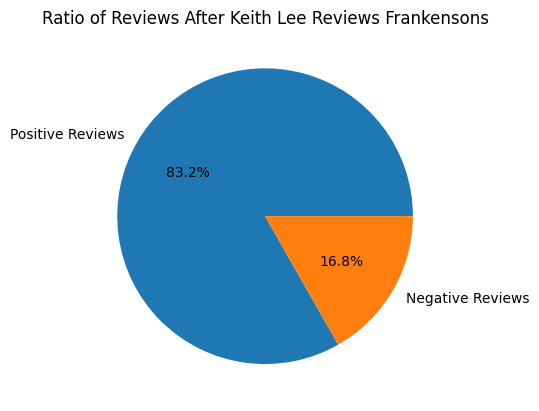

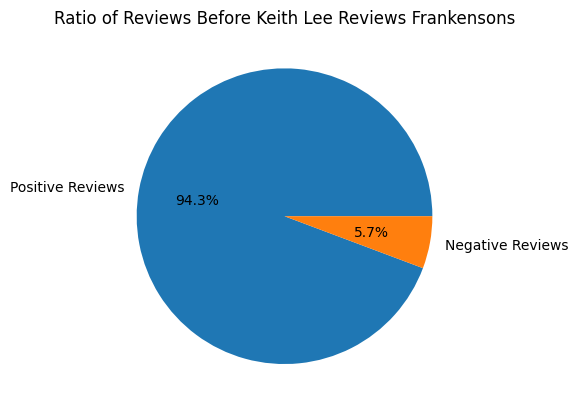

In [20]:
#making pie charts

#AFTER PIE CHART: FRANKENSONS
values = [positiveRatioAfter, negativeRatioAfter]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews After Keith Lee Reviews Frankensons')
plt.show()

#BEFORE PIE CHART: FRANKENSONS
values = [positiveRatioBefore, negativeRatioBefore]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews Before Keith Lee Reviews Frankensons')
plt.show()